# Car Features, Price, and Popularity
## by Robert Bruton

## Preliminary Wrangling and Exploratory Analysis

This dataset is the "Car Features and MSRP" dataset by CooperUnion on Kaggle. This dataset features 16 columns of variables for almost 12,000 rows of observations. The data was originally scraped from Edmunds and Twitter. This dataset can be found at: https://www.kaggle.com/CooperUnion/cardataset 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Import csv file of dataset into pandas df

cars = pd.read_csv('car_data.csv')

In [4]:
# Define function to inspect data frames. Prints first few lines, determines size/shape of data frame,
# shows descriptive statistics, shows data types, shows missing or incomplete data, check for duplicate data.

def inspect_df(df):
    print('Header:')
    print('{}'.format(df.head()))
    print()
    print('Shape: {}'.format(df.shape))
    print()
    print('Statistics:')
    print('{}'.format(df.describe()))
    print()
    print('Info:')
    print('{}'.format(df.info()))

In [5]:
# Use inspect_df on cars data frame

inspect_df(cars)

Header:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact  

In [6]:
# Change column headers

cars.columns = ['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'trans', 'drive', 'doors', 'category', 'vsize', 'body',
               'hwy_mpg', 'city_mpg', 'popularity', 'price']

In [7]:
# Drop market category column

cars = cars.drop(columns = 'category')

In [8]:
# Drop rows with important missing data (market category not important)

cars = cars.dropna()

In [9]:
# Change data types of some columns

cars.make = cars.make.astype('category')
cars.fuel = cars.fuel.astype('category')
cars.hp = cars.hp.astype('int64')
cars.cylinders = cars.cylinders.astype('int64')
cars.trans = cars.trans.astype('category')
cars.drive = cars.drive.astype('category')
cars.doors = cars.doors.astype('category')
cars.vsize = cars.vsize.astype('category')
cars.body = cars.body.astype('category')

In [10]:
# Use inspect_df on cars data frame again

inspect_df(cars)

Header:
  make       model  year                         fuel   hp  cylinders   trans  \
0  BMW  1 Series M  2011  premium unleaded (required)  335          6  MANUAL   
1  BMW    1 Series  2011  premium unleaded (required)  300          6  MANUAL   
2  BMW    1 Series  2011  premium unleaded (required)  300          6  MANUAL   
3  BMW    1 Series  2011  premium unleaded (required)  230          6  MANUAL   
4  BMW    1 Series  2011  premium unleaded (required)  230          6  MANUAL   

              drive doors    vsize         body  hwy_mpg  city_mpg  \
0  rear wheel drive   2.0  Compact        Coupe       26        19   
1  rear wheel drive   2.0  Compact  Convertible       28        19   
2  rear wheel drive   2.0  Compact        Coupe       28        20   
3  rear wheel drive   2.0  Compact        Coupe       28        18   
4  rear wheel drive   2.0  Compact  Convertible       28        18   

   popularity  price  
0        3916  46135  
1        3916  40650  
2        3916  

### What is the structure of your dataset?

After cleaning, there are 11812 rows of observations with 15 columns of variables and no missing values. The variables contain 7 categoricals, 1 string, and 7 integer numerics. The only categorical variable that has an order is the vsize (vehicle size) which contains compact (smallest), midsize, and large (largest).

### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in which features have the strongest correlation with price.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the price will be strongly affected by hp, size, body style, and make. I hypothesize that make will be the best predictor of price.

## Univariate Exploration

Start by looking at distribution of price

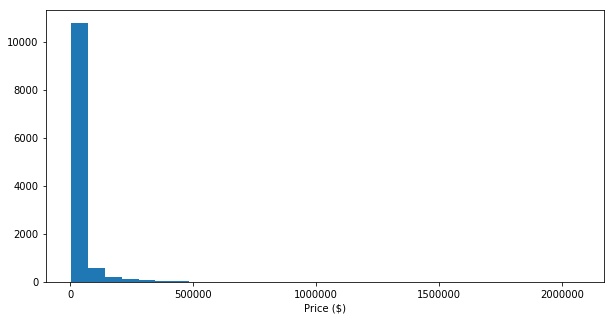

In [11]:
# Histogram of price

plt.figure(figsize=[10, 5])
plt.hist(data = cars, x = 'price', bins = 30)
plt.xlabel('Price ($)');

The data is very skewed due to the max price outlier. Set x axis limit to focus on values under 50,000

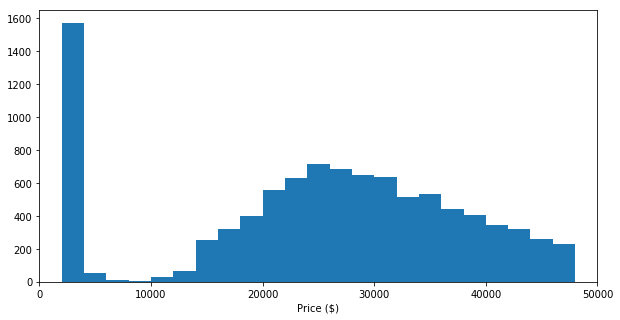

In [12]:
# Histogram of price

bins = np.arange(0, 50000, 2000)
plt.figure(figsize=[10, 5])
plt.hist(data = cars, x = 'price', bins = bins)
plt.xlim(0, 50000)
plt.xlabel('Price ($)');

There are a lot of cars in the 2000 to 4000 range, a couple outliers close to 200,000, and the majority of data falling in a fairly normal distribution between 10,000 and 50,000. Let's look at a box plot of the distribution.

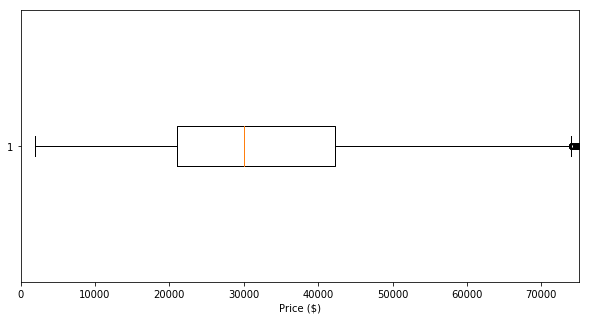

In [13]:
# Box plot of price

plt.figure(figsize=[10, 5])
plt.boxplot(cars.price, vert=False)
plt.xlim(0, 75000)
plt.xlabel('Price ($)');

The median of the price is around 30,000, with half of the data lying between about 20,000 and 40,000 and anything above about 75,000 is an outlier.

Next, looking at predictor variables, starting with the categorical variables.

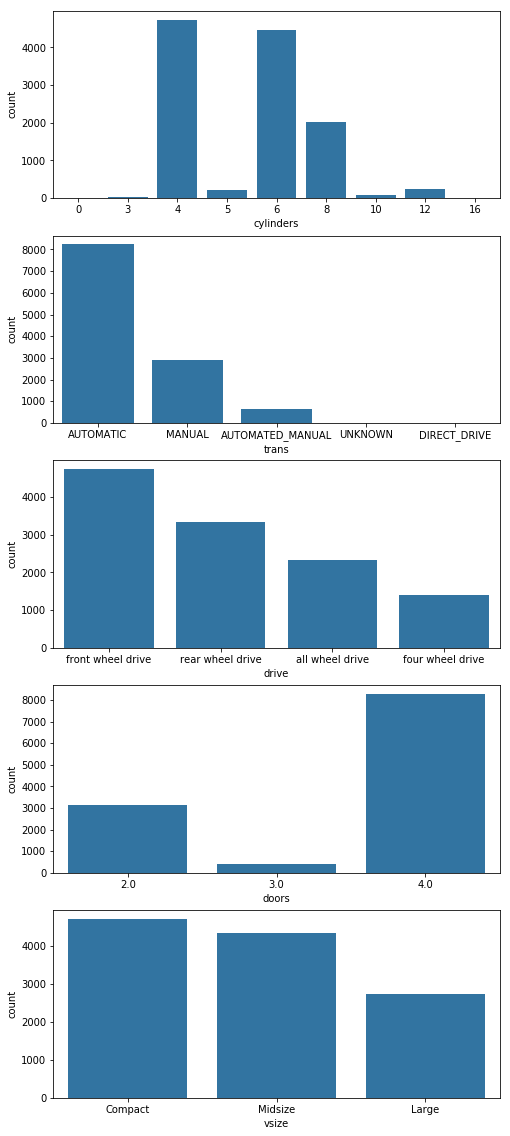

In [41]:
# Bar plots of most categorical variables

fig, ax = plt.subplots(nrows=5, figsize = [8,20])

default_color = sb.color_palette()[0]

sb.countplot(data = cars, x = 'cylinders', color = default_color, ax = ax[0])
sb.countplot(data = cars, x = 'trans', color = default_color, ax = ax[1], order = cars.trans.value_counts().index)
sb.countplot(data = cars, x = 'drive', color = default_color, ax = ax[2], order = cars.drive.value_counts().index)
sb.countplot(data = cars, x = 'doors', color = default_color, ax = ax[3])
sb.countplot(data = cars, x = 'vsize', color = default_color, ax = ax[4], order = cars.vsize.value_counts().index);

The majority of cars in the dataset have 4, 6, or 8 cylider engines with most having automatic transmissions but a decent number having manual transmissions. Very few cars have different numbers of cylinders or different types of transmissions from those. Most cars are 4-door models, with a good number of 2-door and a few 3-door models as well. Front wheel drive is most common, but the distribution of drive types is fairly balanced. Compact is the most common size, with slightly fewer midsize but a decent number of large as well. 

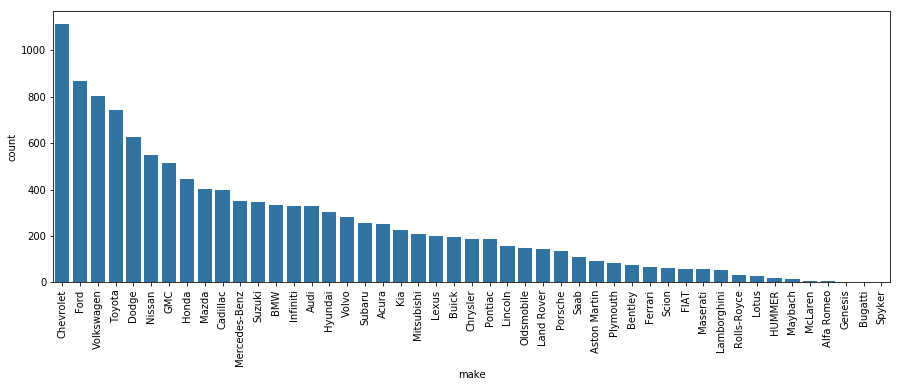

In [42]:
# Bar plot of makes

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'make', color = default_color, order = cars.make.value_counts().index)
plt.xticks(rotation=90);

In [38]:
cars.make.value_counts()

Chevrolet        1115
Ford              868
Volkswagen        805
Toyota            743
Dodge             626
Nissan            548
GMC               515
Honda             447
Mazda             403
Cadillac          397
Mercedes-Benz     352
Suzuki            348
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               226
Mitsubishi        210
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           156
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            68
Scion              60
FIAT               59
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis             3
Bugatti   

There are a large number of options for make in the dataset, but the distribution heavily favors the more common makes (duh). The top 5 most common are Chevrolet, Ford, Volkswagen, Toyota, and Dodge, in that order. There are several cars that are 'exotics' that have much less representation but are likely to be outliers on the high end of price so attention will need to be paid to these.

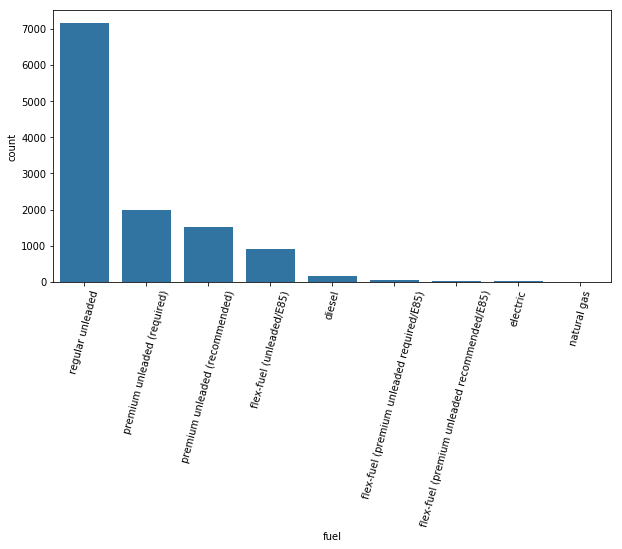

In [43]:
# Bar plot of fuel types

plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'fuel', color = default_color, order = cars.fuel.value_counts().index)
plt.xticks(rotation=75);

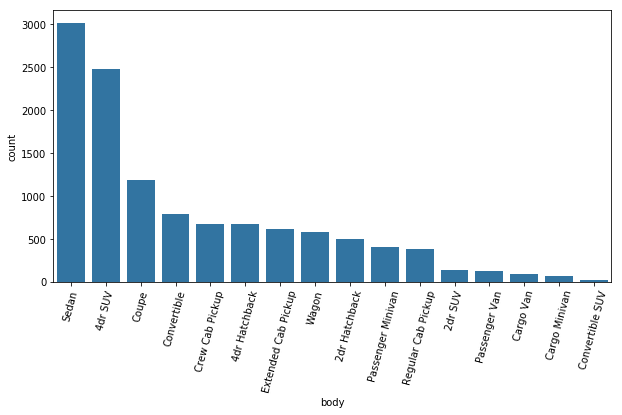

In [44]:
# Bar plot of body styles

plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'body', color = default_color, order = cars.body.value_counts().index)
plt.xticks(rotation=75);

By far the most common fuel type is regular unleaded with more than triple the count of the next most common. Premium unleaded fuel is the next most common (either required or recommended) followed by flex fuel and diesel with alternatives such as electric and natural gas being pretty uncommon. Car body style has quite a few options, but sedans and 4-door SUVs are by far the most common with coupe being the next most common.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!